Assessing macro-level credit health of the US economy as a credit analyst

Time: 12:36 pm to 12:45 pm

Notes: For this presentation, the group is to search online for data sources that is useful to assess Corporate America’s credit health (examples could include bankruptcy rates, default rates on loans), credit spreads etc. TradingEconomics and FRED are examples of such sources but the group should try to research more datasets of interest to introduce to the class.

Where possible, the group should try to show examples of what kind of analyses that could be possible with the data that is available. If there is not enough time to convey these, please attach jupyter notebooks with markups where possible and summarize the major findings from the analyses in the presentation.

# Indicators for credit risk
Delinquency Rate on All Loans, All Commercial Banks: https://fred.stlouisfed.org/series/DRALACBN  <br>
Total Debt to Equity for United States: https://fred.stlouisfed.org/series/TOTDTEUSQ163N  <br>
Moody's Seasoned Aaa Corporate Bond Yield Relative to Yield on 10-Year Treasury Constant Maturity: https://fred.stlouisfed.org/series/AAA10YM 

# Cause/ impact metrics
Sticky Price Consumer Price Index less Food, Energy, and Shelter :https://fred.stlouisfed.org/series/CRESTKCPIXSLTRM159SFRBATL <br>
Unemployment Rate (Change Data to Quarterly): https://fred.stlouisfed.org/series/UNRATE <br>



## Importing packages


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf
import math


## Data Cleaning

In [2]:
# Load the data from CSV files
file_path_delinquency = 'delinquency.csv'
file_path_debt_to_equity = 'total-debt-equity.csv'
file_path_ue = 'umemployment.csv'
file_path_sticky_cpi = 'sticky_cpi_less_food_energy.csv'

# Read CSV files into DataFrames
delinquency = pd.read_csv(file_path_delinquency)
debt_to_equity = pd.read_csv(file_path_debt_to_equity)
ue = pd.read_csv(file_path_ue)
sticky_cpi = pd.read_csv(file_path_sticky_cpi)

# Combine all datasets into a list for easier iteration
datasets = [delinquency, debt_to_equity, ue, sticky_cpi]

# Clean the datasets by handling missing values
for dataset in datasets:
    # Convert 'DATE' columns to datetime format
    dataset['DATE'] = pd.to_datetime(dataset['DATE'])
    
    # Drop rows with missing values
    dataset.dropna(inplace=True)

# Set the 'DATE' column as the index for each DataFrame
delinquency.set_index('DATE', inplace=True)
debt_to_equity.set_index('DATE', inplace=True)
ue.set_index('DATE', inplace=True)
sticky_cpi.set_index('DATE', inplace=True)

# Define colors for each variable
colors = ['blue', 'green', 'red', 'purple']

# Plot all variables against date
# plt.figure(figsize=(12, 8))


# # Inflation
# plt.subplot(3, 2, 4)
# plt.plot(inf.index, inf['INFLATION'], label='Inflation', color=colors[3])
# plt.title('Inflation')
# plt.xlabel('Date')
# plt.ylabel('Rate')


# CPI
# plt.subplot(3, 2, 2)
# plt.plot(cpi.index, cpi['CPI'], label='CPI', color=colors[1])
# plt.title('CPI')
# plt.xlabel('Date')
# plt.ylabel('Index')



## Plotting Line Graphs for the variables

Text(0, 0.5, 'Ratio (%)')

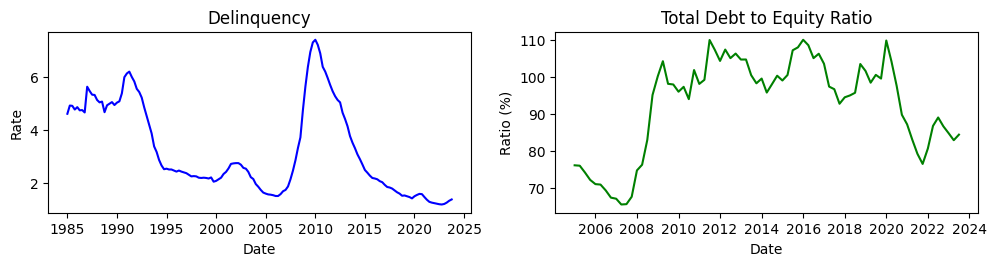

In [3]:
# indicators of credit health are delinquency rate and total debt to equity ratio 
plt.figure(figsize=(12, 8))
# Delinquency
plt.subplot(3, 2, 5)
plt.plot(delinquency.index, delinquency['DELINQUENCY'], label='Delinquency', color=colors[0])
plt.title('Delinquency')
plt.xlabel('Date')
plt.ylabel('Rate')

# Total Debt to Equity Ratio
plt.subplot(3, 2, 6)
plt.plot(debt_to_equity.index, debt_to_equity['TOTAL DEBT TO EQUITY'], label='Total Debt to Equity Ratio', color=colors[1])
plt.title('Total Debt to Equity Ratio')
plt.xlabel('Date')
plt.ylabel('Ratio (%)')

Text(0, 0.5, 'Spread')

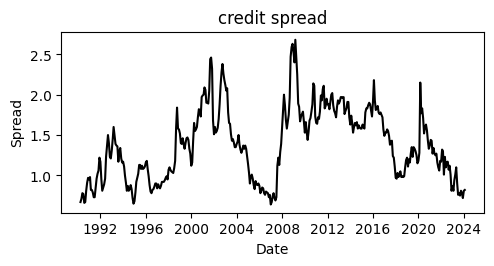

In [22]:
file_path_credit_spread = 'credit_spread.csv'
credit_spread = pd.read_csv(file_path_credit_spread)
credit_spread['DATE'] = pd.to_datetime(credit_spread['DATE'], format = '%d/%m/%y')
credit_spread.set_index('DATE', inplace = True)
credit_spread
plt.figure(figsize=(12, 8))
# Delinquency
plt.subplot(3, 2, 5)
plt.plot(credit_spread.index, credit_spread['CREDIT SPREAD'], label='Delinquency', color='black')
plt.title('credit spread')
plt.xlabel('Date')
plt.ylabel('Spread')

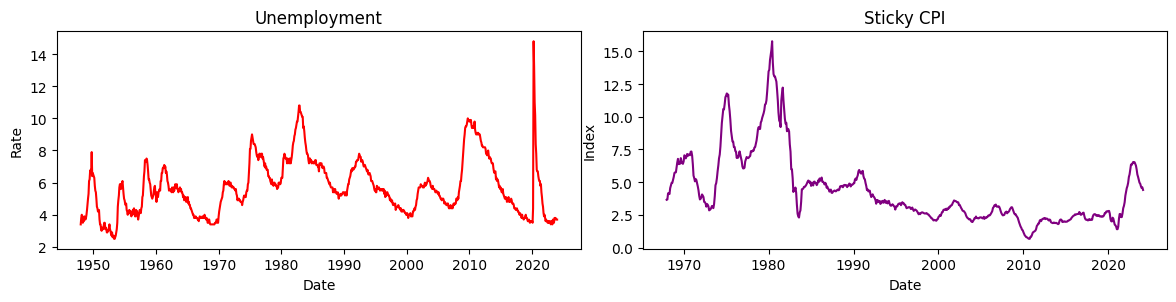

In [5]:
# macroeconomic factors that could impact the indicators are unemployment rate and sticky cpi

plt.figure(figsize=(12, 8))
# Unemployment
plt.subplot(3, 2, 5)
plt.plot(ue.index, ue['UNEMPLOYMENT'], label='Unemployment', color=colors[2])
plt.title('Unemployment')
plt.xlabel('Date')
plt.ylabel('Rate')

# Sticky CPI
plt.subplot(3, 2, 6)
plt.plot(sticky_cpi.index, sticky_cpi['Sticky CPI'], label='Sticky CPI', color=colors[3])
plt.title('Sticky CPI')
plt.xlabel('Date')
plt.ylabel('Index')

plt.tight_layout()
plt.show()


## Trend and Seasonality of Delinquency

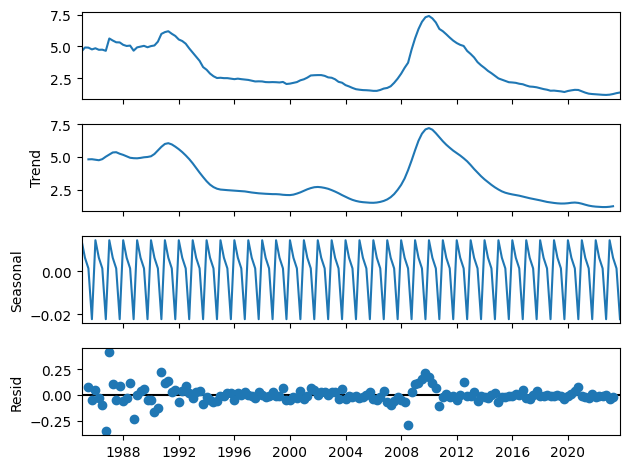

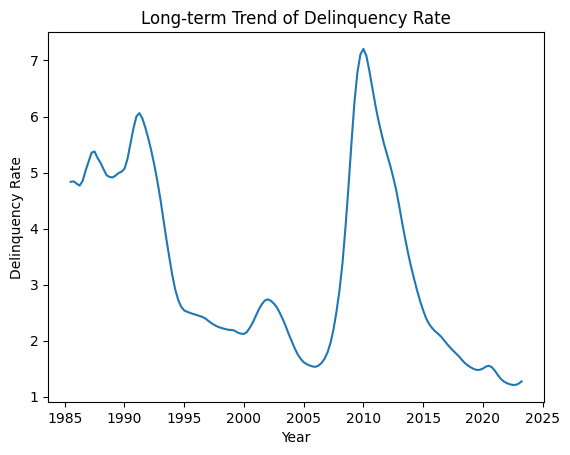

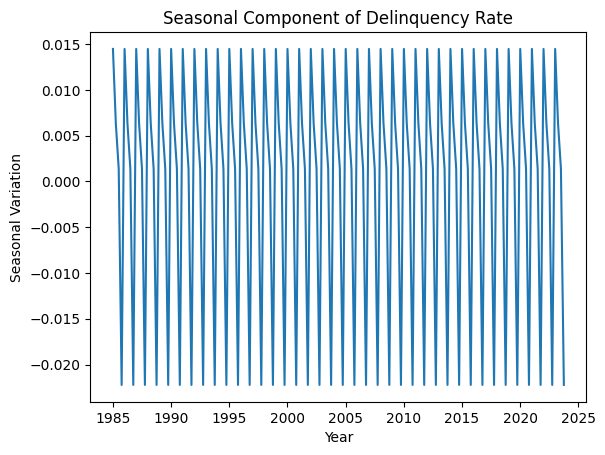

In [6]:
# Perform seasonal decomposition
result = seasonal_decompose(delinquency, model='additive')

# Plot the decomposition
result.plot()
plt.show()

# Extract trend component
trend = result.trend.dropna()

# Plot the trend component
plt.plot(trend)
plt.title('Long-term Trend of Delinquency Rate')
plt.xlabel('Year')
plt.ylabel('Delinquency Rate')
plt.show()

# Extract seasonal component
seasonal = result.seasonal.dropna()

# Plot the seasonal component
plt.plot(seasonal)
plt.title('Seasonal Component of Delinquency Rate')
plt.xlabel('Year')
plt.ylabel('Seasonal Variation')
plt.show()

## ACF of Delinquency

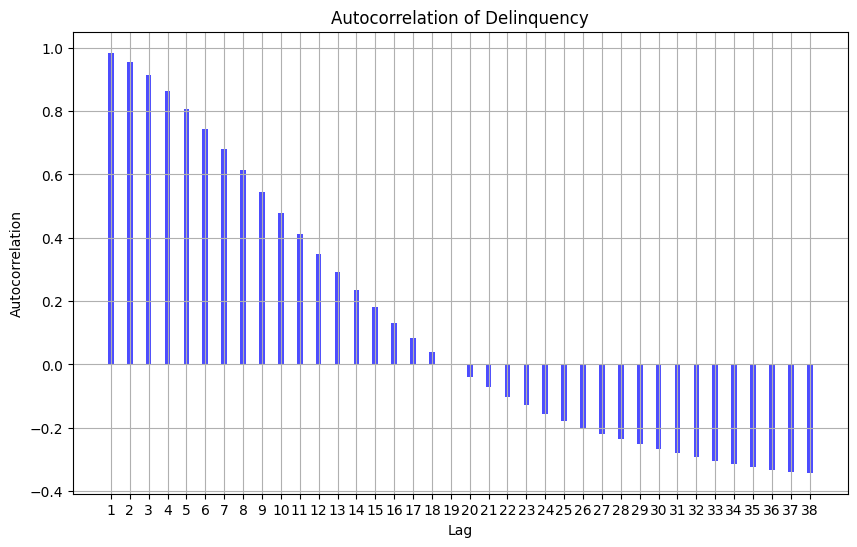

In [7]:

# Assuming delinquency is your DataFrame with the DELINQUENCY column
# Assuming DATE column is already set as the index and in datetime format

# Calculate autocorrelation
lag = math.floor(len(delinquency) / 4)
# print(lags)
lags = range(1, lag)  # You can adjust the range of lags as needed
acf_vals = acf(delinquency['DELINQUENCY'], nlags= lag - 1)  # nlags is the number of lags to calculate

# Plot autocorrelation
plt.figure(figsize=(10, 6))
plt.bar(lags, acf_vals[1:], width=0.3, color='b', alpha=0.7)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of Delinquency')
plt.xticks(lags)
plt.grid(True)
plt.show()

## Trend and Seasonality of Total Debt To Equity Ratio

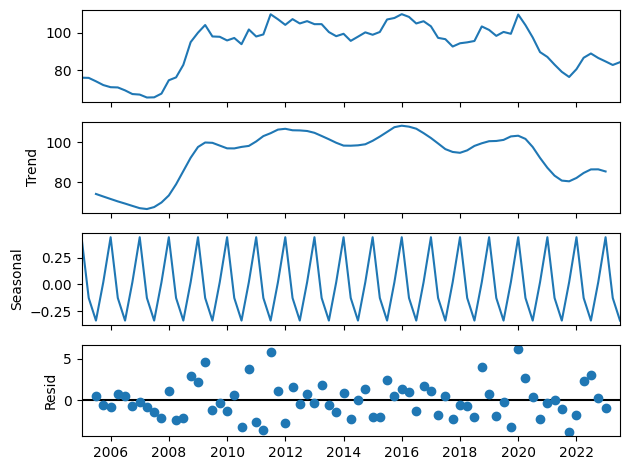

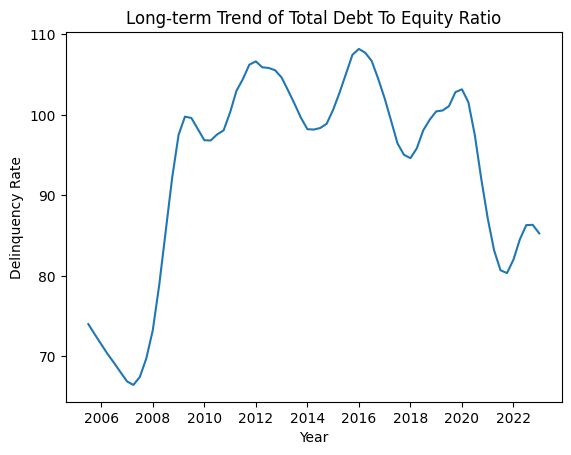

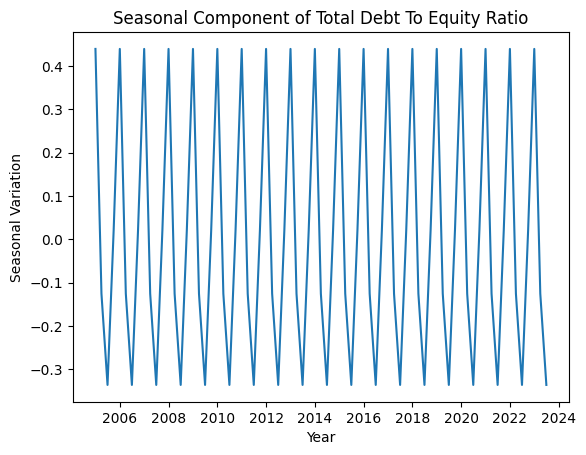

In [8]:
# Perform seasonal decomposition
result_dte = seasonal_decompose(debt_to_equity, model='additive')

# Plot the decomposition
result_dte.plot()
plt.show()

# Extract trend component
trend = result_dte.trend.dropna()

# Plot the trend component
plt.plot(trend)
plt.title('Long-term Trend of Total Debt To Equity Ratio')
plt.xlabel('Year')
plt.ylabel('Delinquency Rate')
plt.show()

# Extract seasonal component
seasonal = result_dte.seasonal.dropna()

# Plot the seasonal component
plt.plot(seasonal)
plt.title('Seasonal Component of Total Debt To Equity Ratio')
plt.xlabel('Year')
plt.ylabel('Seasonal Variation')
plt.show()

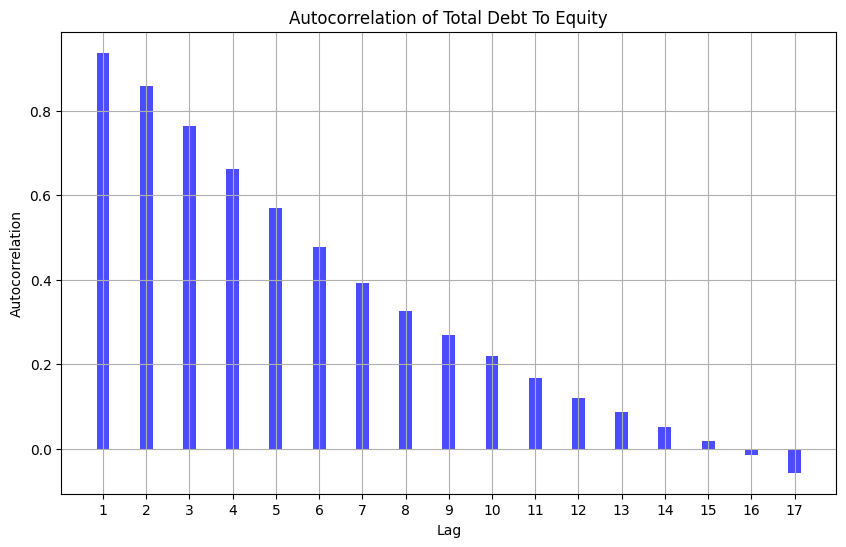

In [9]:

# Assuming delinquency is your DataFrame with the DELINQUENCY column
# Assuming DATE column is already set as the index and in datetime format

# Calculate autocorrelation
lag = math.floor(len(debt_to_equity) / 4)
lags = range(1, lag)  # You can adjust the range of lags as needed
acf_vals = acf(debt_to_equity['TOTAL DEBT TO EQUITY'], nlags=lag - 1)  # nlags is the number of lags to calculate

# Plot autocorrelation
plt.figure(figsize=(10, 6))
plt.bar(lags, acf_vals[1:], width=0.3, color='b', alpha=0.7)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of Total Debt To Equity')
plt.xticks(lags)
plt.grid(True)
plt.show()

## Trend and Seasonality of Credit Spread


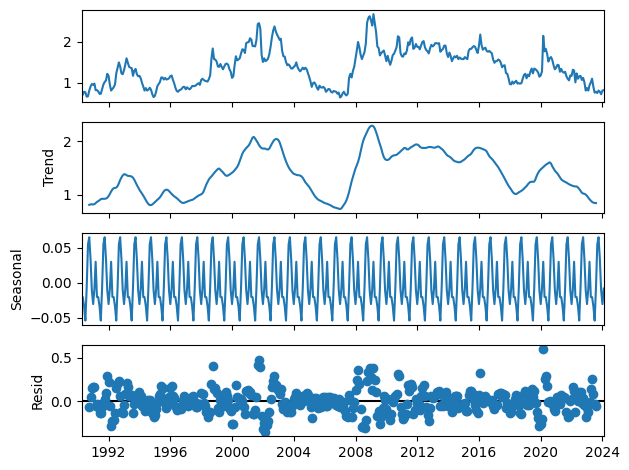

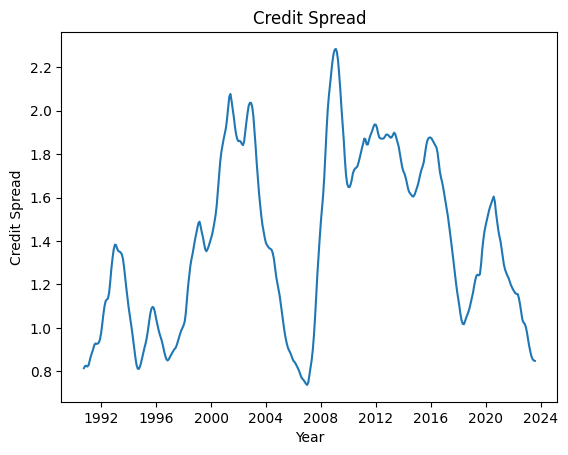

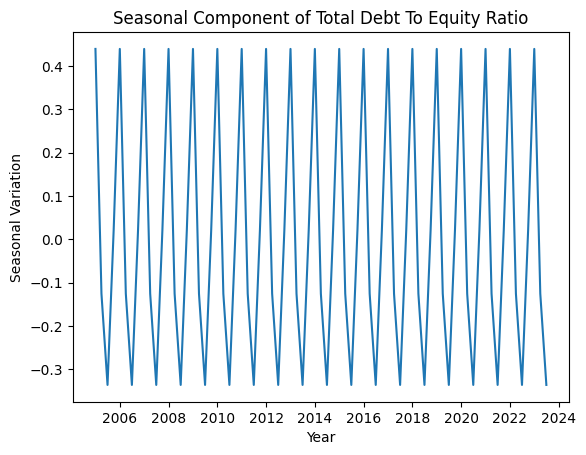

In [10]:
# Perform seasonal decomposition
result_cs = seasonal_decompose(credit_spread, model='additive')

# Plot the decomposition
result_cs.plot()
plt.show()

# Extract trend component
trend = result_cs.trend.dropna()

# Plot the trend component
plt.plot(trend)
plt.title('Credit Spread')
plt.xlabel('Year')
plt.ylabel('Credit Spread')
plt.show()

# Extract seasonal component
seasonal = result_dte.seasonal.dropna()

# Plot the seasonal component
plt.plot(seasonal)
plt.title('Seasonal Component of Total Debt To Equity Ratio')
plt.xlabel('Year')
plt.ylabel('Seasonal Variation')
plt.show()

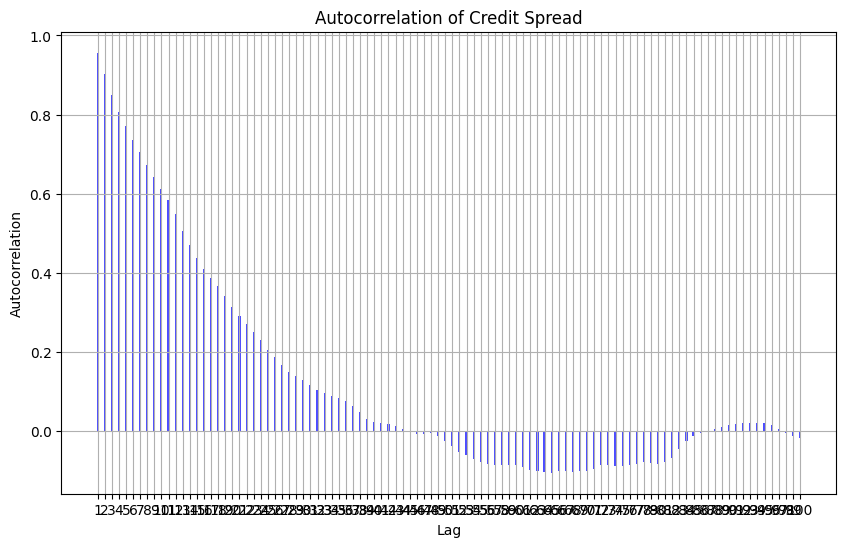

In [11]:
# Calculate autocorrelation
lag = math.floor(len(credit_spread) / 4)
lags = range(1, lag)  # You can adjust the range of lags as needed
acf_vals = acf(credit_spread['CREDIT SPREAD'], nlags=lag - 1)  # nlags is the number of lags to calculate

# Plot autocorrelation
plt.figure(figsize=(10, 6))
plt.bar(lags, acf_vals[1:], width=0.3, color='b', alpha=0.7)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of Credit Spread')
plt.xticks(lags)
plt.grid(True)
plt.show()

In [12]:
delinquency.head(10)

,DELINQUENCY
DATE,
1985-01-01,4.61
1985-04-01,4.92
1985-07-01,4.91
1985-10-01,4.77
1986-01-01,4.86
1986-04-01,4.74
1986-07-01,4.75
1986-10-01,4.66
1987-01-01,5.63


In [13]:
delinquency.shift(1)

,DELINQUENCY
DATE,
1985-01-01,NaN
1985-04-01,4.61
1985-07-01,4.92
1985-10-01,4.91
1986-01-01,4.77
...,...
2022-10-01,1.20
2023-01-01,1.19
2023-04-01,1.21


## Find the average values for the relevant metric's columns for each year for each dataset

In [14]:
# find the average values for the relevant metric's columns for each year for each dataset

delinquency_yearly = delinquency.resample('Y').mean()
debt_to_equity_yearly = debt_to_equity.resample('Y').mean()
sticky_cpi_yearly = sticky_cpi.resample('Y').mean()
ue_yearly = ue.resample('Y').mean()
credit_spread_yearly = credit_spread.resample('Y').mean()

# Finding correlations between time-lagged values between macroeconomic factors and the indicators(debt to equity ratio, delinquency rate)

In [15]:
# Merge delinquency_yearly and sticky_cpi_yearly on the year value in the DATE column
delin_sticky_cpi = pd.merge(delinquency_yearly, sticky_cpi_yearly, how='inner', left_index=True, right_index=True)

# Rename the columns for clarity
delin_sticky_cpi.columns = ['delinquency', 'sticky_cpi']

# print(delin_sticky_cpi)


# Shift the sticky_cpi column by one year
delin_sticky_cpi['lagged_sticky_cpi'] = delin_sticky_cpi['sticky_cpi'].shift(1)

# print(delin_sticky_cpi.head(5))

# Drop rows with NaN values in the lagged_sticky_cpi column
delin_sticky_cpi_dropna = delin_sticky_cpi.dropna(subset=['lagged_sticky_cpi'])

# print(delin_sticky_cpi_dropna.head(5))

# Calculate the correlation between lagged_sticky_cpi and delinquency
correlation = delin_sticky_cpi_dropna['lagged_sticky_cpi'].corr(delin_sticky_cpi_dropna['delinquency'])

print("Correlation between lagged_sticky_cpi and delinquency:", correlation)


Correlation between lagged_sticky_cpi and delinquency: 0.30998270009843937


In [16]:
# Merge delinquency_yearly and ue_yearly on the year value in the DATE column
delin_ue = pd.merge(delinquency_yearly, ue_yearly, how='inner', left_index=True, right_index=True)

# Rename the columns for clarity
delin_ue.columns = ['delinquency', 'ue']

# Create a lagged column for 'ue'
delin_ue['lagged_ue'] = delin_ue['ue'].shift(1)

# Drop NaN values (first row)
delin_ue_dropna = delin_ue.dropna(subset=['lagged_ue'])

# Calculate the correlation between delinquency and lagged_ue
correlation = delin_ue_dropna['delinquency'].corr(delin_ue_dropna['lagged_ue'])

print("Correlation between delinquency and lagged_ue:", correlation)


Correlation between delinquency and lagged_ue: 0.578930838353499


In [17]:
# Merge debt_to_equity_yearly and sticky_cpi on the year value in the DATE column
debt_to_equity_sticky_cpi = pd.merge(debt_to_equity_yearly, sticky_cpi_yearly, how='inner', left_index=True, right_index=True)

# Rename the columns for clarity
debt_to_equity_sticky_cpi.columns = ['total_debt_to_equity', 'sticky_cpi']

# Create a lagged column for 'ue'
debt_to_equity_sticky_cpi['lagged_sticky_cpi'] = debt_to_equity_sticky_cpi['sticky_cpi'].shift(1)

# Drop NaN values (first row)
debt_to_equity_sticky_cpi_dropna = debt_to_equity_sticky_cpi.dropna(subset=['lagged_sticky_cpi'])

# Calculate the correlation between total_debt_to_equity and lagged_sticky_cpi
correlation = debt_to_equity_sticky_cpi_dropna['total_debt_to_equity'].corr(debt_to_equity_sticky_cpi_dropna['lagged_sticky_cpi'])

print("Correlation between total_debt_to_equity and lagged_sticky_cpi:", correlation)


Correlation between total_debt_to_equity and lagged_sticky_cpi: -0.4184597856991213


In [18]:
# Merge debt_to_equity_yearly and sticky_cpi on the year value in the DATE column
debt_to_equity_ue = pd.merge(debt_to_equity_yearly, ue_yearly, how='inner', left_index=True, right_index=True)

# Rename the columns for clarity
debt_to_equity_ue.columns = ['total_debt_to_equity', 'ue']

# Create a lagged column for 'ue'
debt_to_equity_ue['lagged_ue'] = debt_to_equity_ue['ue'].shift(1)

# Drop NaN values (first row)
debt_to_equity_ue_dropna = debt_to_equity_ue.dropna(subset=['lagged_ue'])

# Calculate the correlation between total_debt_to_equity and lagged_ue
correlation = debt_to_equity_ue_dropna['total_debt_to_equity'].corr(debt_to_equity_ue_dropna['lagged_ue'])

print("Correlation between total_debt_to_equity and lagged_ue:", correlation)


Correlation between total_debt_to_equity and lagged_ue: 0.3282327533774635


In [19]:
# Merge credit_spread_yearly and sticky_cpi on the year value in the DATE column
credit_spread_sticky_cpi = pd.merge(credit_spread_yearly, sticky_cpi_yearly, how='inner', left_index=True, right_index=True)

# Rename the columns for clarity
credit_spread_sticky_cpi.columns = ['credit_spread', 'sticky_cpi']

# Create a lagged column for 'ue'
credit_spread_sticky_cpi['lagged_sticky_cpi'] = credit_spread_sticky_cpi['sticky_cpi'].shift(1)

# Drop NaN values (first row)
credit_spread_sticky_cpi_dropna = credit_spread_sticky_cpi.dropna(subset=['lagged_sticky_cpi'])

# Calculate the correlation between total_debt_to_equity and lagged_sticky_cpi
correlation = credit_spread_sticky_cpi_dropna['credit_spread'].corr(credit_spread_sticky_cpi_dropna['lagged_sticky_cpi'])

print("Correlation between credit_spread and lagged_sticky_cpi:", correlation)


Correlation between credit_spread and lagged_sticky_cpi: -0.5157046606143462


In [20]:
# Merge credit_spread_yearly and sticky_cpi on the year value in the DATE column
credit_spread_ue = pd.merge(credit_spread_yearly, ue_yearly, how='inner', left_index=True, right_index=True)

# Rename the columns for clarity
credit_spread_ue.columns = ['credit_spread', 'ue']

# Create a lagged column for 'ue'
credit_spread_ue['lagged_ue'] = credit_spread_ue['ue'].shift(1)

# Drop NaN values (first row)
credit_spread_ue_dropna = credit_spread_ue.dropna(subset=['lagged_ue'])

# Calculate the correlation between total_debt_to_equity and lagged_ue
correlation = credit_spread_ue_dropna['credit_spread'].corr(credit_spread_ue_dropna['lagged_ue'])

print("Correlation between credit_spread and lagged_ue:", correlation)


Correlation between credit_spread and lagged_ue: 0.2787370427987524


# -------------------------------------------------END-------------------------------------------------------------------------------